# Exercise II - Matplotlib
Use the Big-Mart Data for some plotting exercises

In [4]:
#check if notebook runs in colab
import sys
IN_COLAB = 'google.colab' in sys.modules
print('running in Colab:',IN_COLAB)
path='..'
if IN_COLAB:
  #in colab, we need to clone the data from the repo
  !git clone https://github.com/keuperj/DataScienceSS20.git
  path='DataScienceSS20'

running in Colab: False


In [5]:
#import an read big-mart data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv(path+"/DATA/company_sales_data.csv") 


In [6]:
#short preview of the data table
data.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


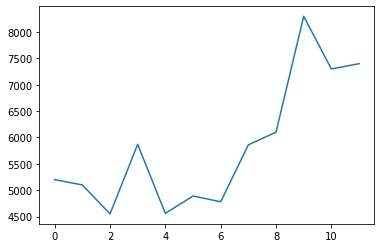

In [7]:
#access data rows by name
plt.plot(data.toothpaste)

## Exercise 1
Read Total profit of all months and show it using a line plot
Total profit data provided for each month. Generated line plot must include the following properties: 

* X label name = Month Number
* Y label name = Total profit


Text(0, 0.5, 'Total profit')

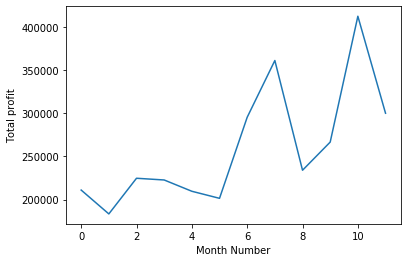

In [8]:
plt.plot(data.total_profit)
plt.xlabel('Month Number')
plt.ylabel('Total profit')

## Exercise 2
Get Total profit of all months and show line plot with the following Style properties
Generated line plot must include following Style properties:

* Line Style dotted and Line color should be red
* Show legend at the lower right location.
* X label name = Month Number
* Y label name = Sold units number
* Add a circle marker.
* Line marker color as read
* Line width should be 3


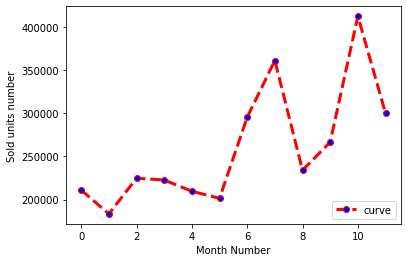

In [9]:
plt.plot(data.total_profit, 'r--', label="curve", marker='o', markerfacecolor='blue', lw=3)
plt.xlabel('Month Number')
plt.ylabel('Sold units number')
plt.legend(loc=4)

## Exercise 3
Read all product sales data and show it  using a multiline plot
Display the number of units sold per month for each product using multiline plots. (i.e., Separate Plotline for each product for each product).

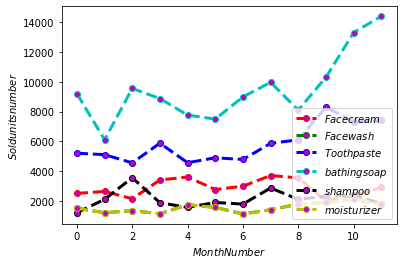

In [10]:
plt.plot(data.facecream, 'r--', label=r"$Facecream$", marker='o', markerfacecolor='m', lw=3)
plt.plot(data.facewash, 'g--', label=r"$Facewash$", marker='o', markerfacecolor='m', lw=3)
plt.plot(data.toothpaste, 'b--', label=r"$Toothpaste$", marker='o', markerfacecolor='m', lw=3)
plt.plot(data.bathingsoap, 'c--', label=r"$bathingsoap$", marker='o', markerfacecolor='m', lw=3)
plt.plot(data.shampoo, 'k--', label=r"$shampoo$", marker='o', markerfacecolor='m', lw=3)
plt.plot(data.moisturizer, 'y--', label=r"$moisturizer$", marker='o', markerfacecolor='m', lw=3)
plt.xlabel(r'$Month Number$')
plt.ylabel(r'$Sold units number$')
plt.legend(loc=4)

## Exercise 4
Read toothpaste sales data of each month and show it using a scatter plot
Also, add a grid in the plot.

Text(0, 0.5, '$TootpasteSales$')

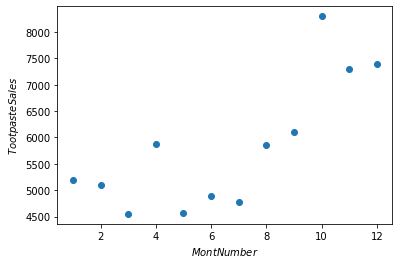

In [11]:
plt.scatter(y=data.toothpaste, x=data.month_number)
plt.xlabel(r'$MontNumber$')
plt.ylabel(r'$TootpasteSales$')

## Exercise 5
Read face cream and facewash product sales data and show it using the bar chart
Bar chart should display the number of units sold per month for each product. Add a separate bar for each product in the same chart.

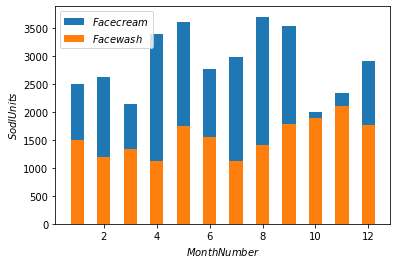

In [12]:
plt.bar(data.month_number, data.facecream,  align="center", width=0.5, label=r'$Facecream$')
plt.bar(data.month_number, data.facewash,   align="center", width=0.5, label=r'$Facewash$')
plt.xlabel(r'$MonthNumber$')
plt.ylabel(r'$SodlUnits$')
plt.legend(loc=2)

## Exercise 6
Calculate total sale data for last year for each product and show it using a Pie chart
Note: In Pie chart display Number of units sold per year for each product in percentage.

***Note:*** use ``data[item].sum()`` to compute sums over columns 

In [64]:
data['toothpaste'].sum()



69910

In [69]:
s= '390abbbs'
A= s.split()

390


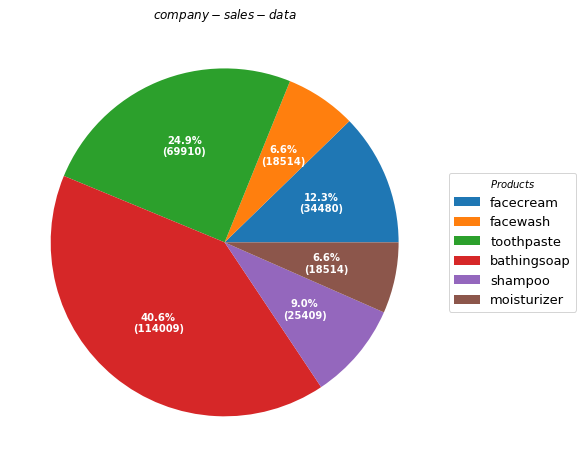

In [82]:
import numpy as np

fig, ax= plt.subplots(figsize=(8,8), subplot_kw=dict(aspect='equal'))
#Erzeuge eine neue Liste sumSalesProducts, in welche die einzelnen Datensätze summiert hinterlegt sind.
#Item als differenzierung der einzelnen Datensätze in Data und als Bedingung zum ausschluss des Monat Datensatzes.
sumSalesProducts= [(data[item].sum()) for item in data if item != 'month_number' if item !='total_units' if item !='total_profit']
#Erzeuge eine neue Liste products, in welchem die einzelnen Namen der Datensätze hinterlegt sind.
products = [data[item].name for item in data if item != 'month_number' if item !='total_units' if item !='total_profit']

#Dem Autopct-Argument wird eine Funktion zur Verfügung getsellt, die die automatische prozentuale Kennzeichnung erweitert, indem sie absolute Werte anzeigt; 
#Letztere berechnen wir aus relativen Daten und der bekannten Summe aller Werte zurück.
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return"{:.1f}%\n({:d})".format(pct, absolute)

#Dann wird der Kuchen erstellt und die zurückgegebenen Objekte für später aufbewahrt.
#Wegde = Keil; Form der Kuchen Stücke :O
#autopct : None (default), string, or function, optional
    #If not None, is a string or function used to label the wedges with their numeric value. 
    #The label will be placed inside the wedge. If it is a format string, the label will be fmt%pct. If it is a function, it will be called.
#textprops : dict, optional, default: None. Dict of arguments to pass to the text objects.
#pct wird automatisch durch autopct erzeugt und als Wert an lambda zur absolut Wertberechnung genutzt.
wedges, texts, autotexts = ax.pie(sumSalesProducts, autopct=lambda pct: func(pct, sumSalesProducts), textprops=dict(color='w'))
#Das erste zurückgegebene Element des zurückgegebenen Tupels ist eine Liste der Wedges. 
#Dies sind matplotlib.patches.wedge patches, die direkt als Basis für eine Legende verwendet werden können. 
#Wir können das bbox_to_anchor-Argument der Legende verwenden, um die Legende außerhalb des Kuchens zu positionieren. 
#Hier verwenden wir die Achsenkoordinaten (1, 0, 0.5, 1) zusammen mit der Position "center left"; 
#d.h. der linke Mittelpunkt der Legende wird am linken Mittelpunkt des Begrenzungsrahmens liegen, der sich in Achsenkoordinaten von (1,0) bis (1.5,1) erstreckt.
ax.legend(wedges, products, title=r"$Products$", loc='center left', bbox_to_anchor=(1,0,0.5, 1), fontsize=13)

plt.setp(autotexts, size=10, weight='bold')

ax.set_title(r'$company-sales-data$')

plt.show()